# Regression 
Predicting how many working hours a worker will miss 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [80]:
plt.style.use("ggplot") 

In [3]:
import pandas_profiling # a package to familirise ourself with the teh dataset quickly

/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [158]:
data = pd.read_csv("data/Absenteeism_at_work.csv")

In [13]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [159]:
data = data[~data.duplicated()]

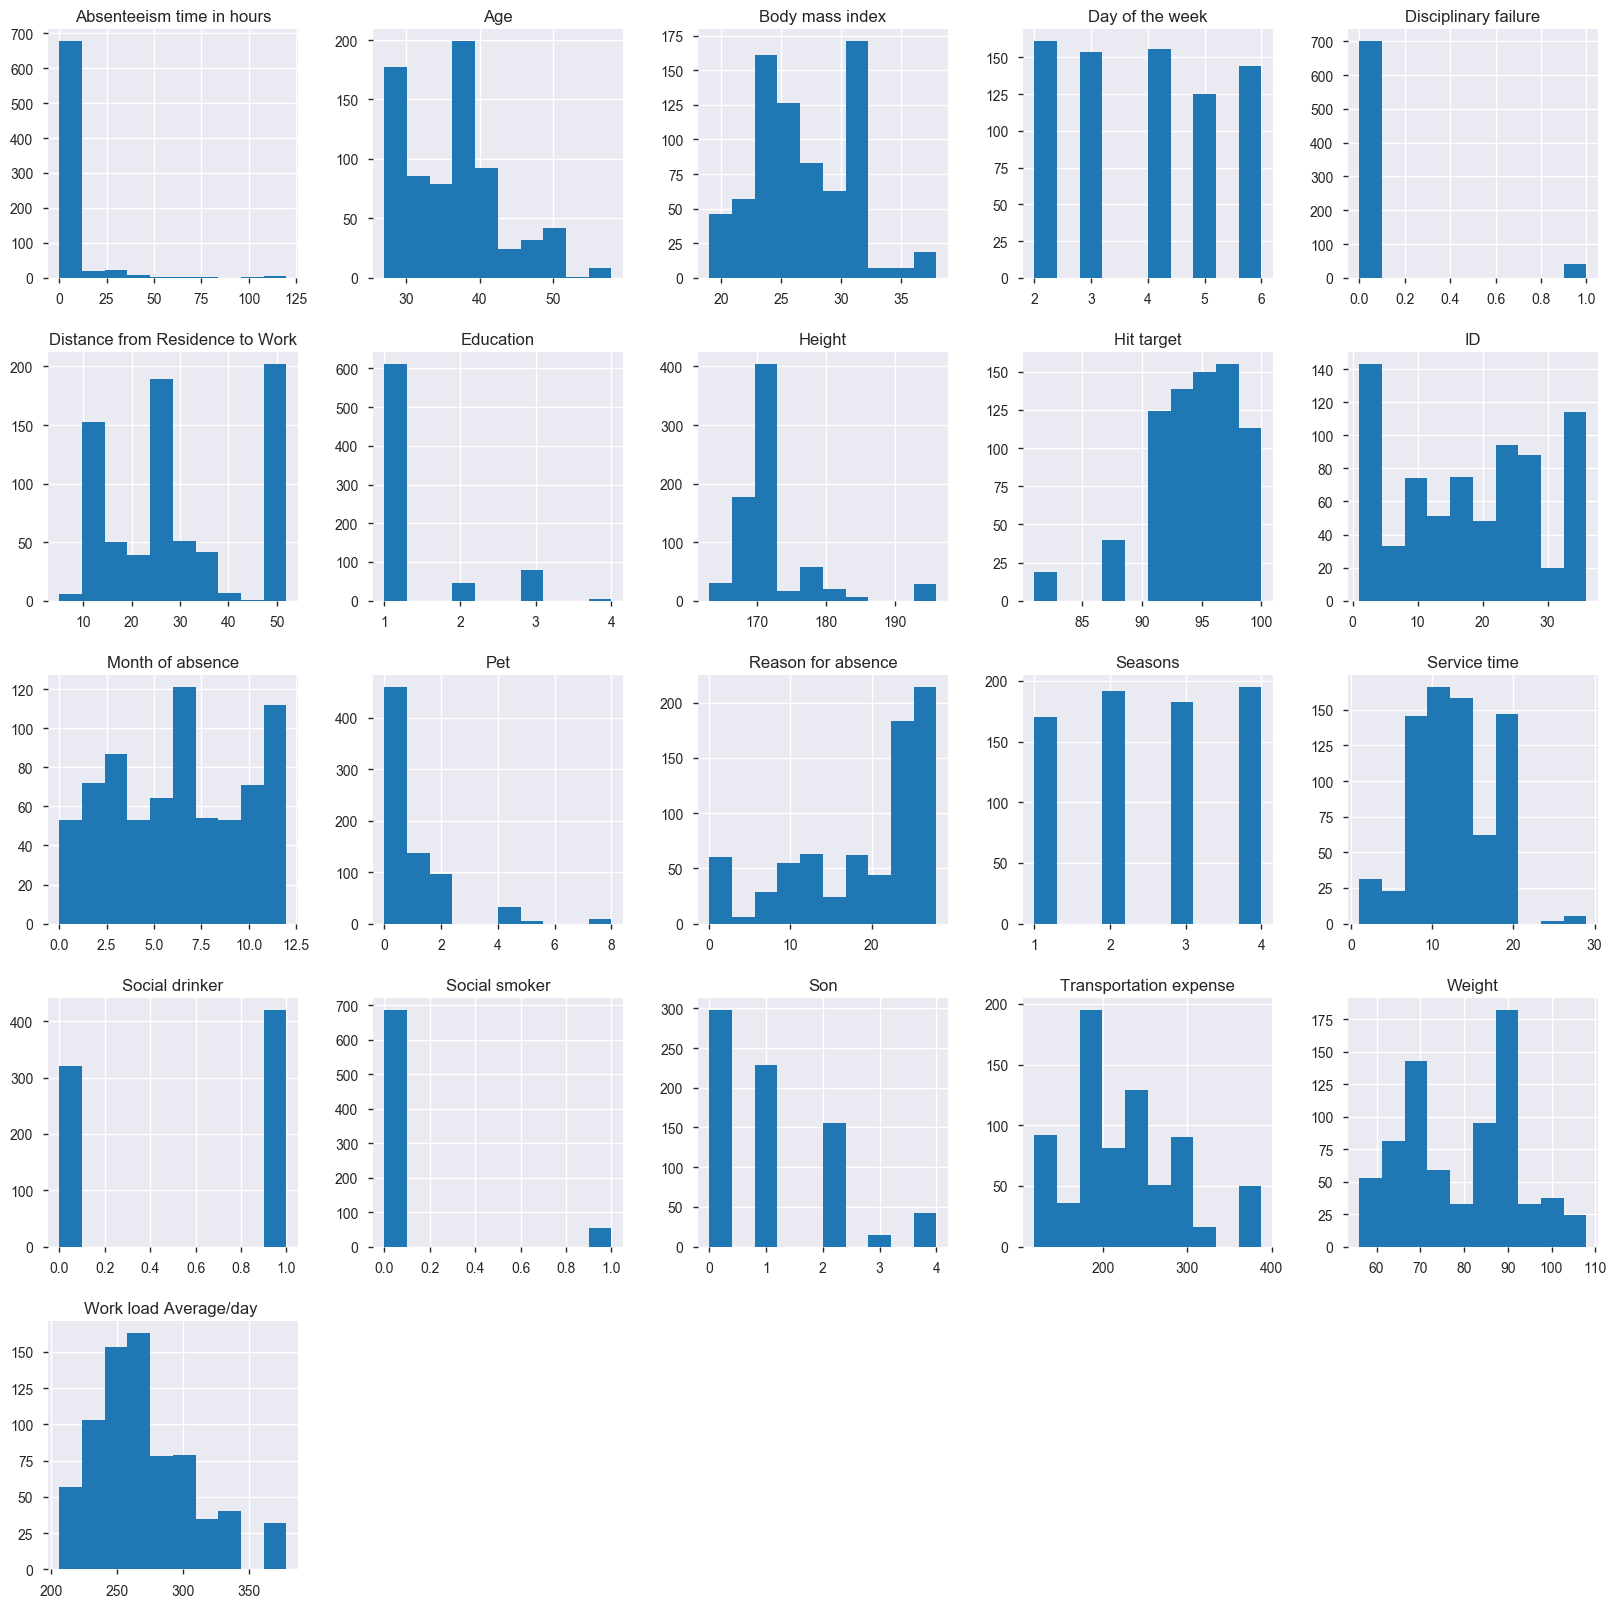

In [8]:
data.hist(figsize=(20, 20));

In [6]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [160]:
data.drop(['ID'], axis=1, inplace=True) 

In [101]:
target = ['Absenteeism time in hours']

numerical = [
    'Age', 
    'Body mass index', 'Distance from Residence to Work',
    'Height', 'Hit target', 'Service time', 'Transportation expense',
    'Weight', 'Work load Average/day '
]

categorical = [col for col in data.columns if col not in numerical+target]

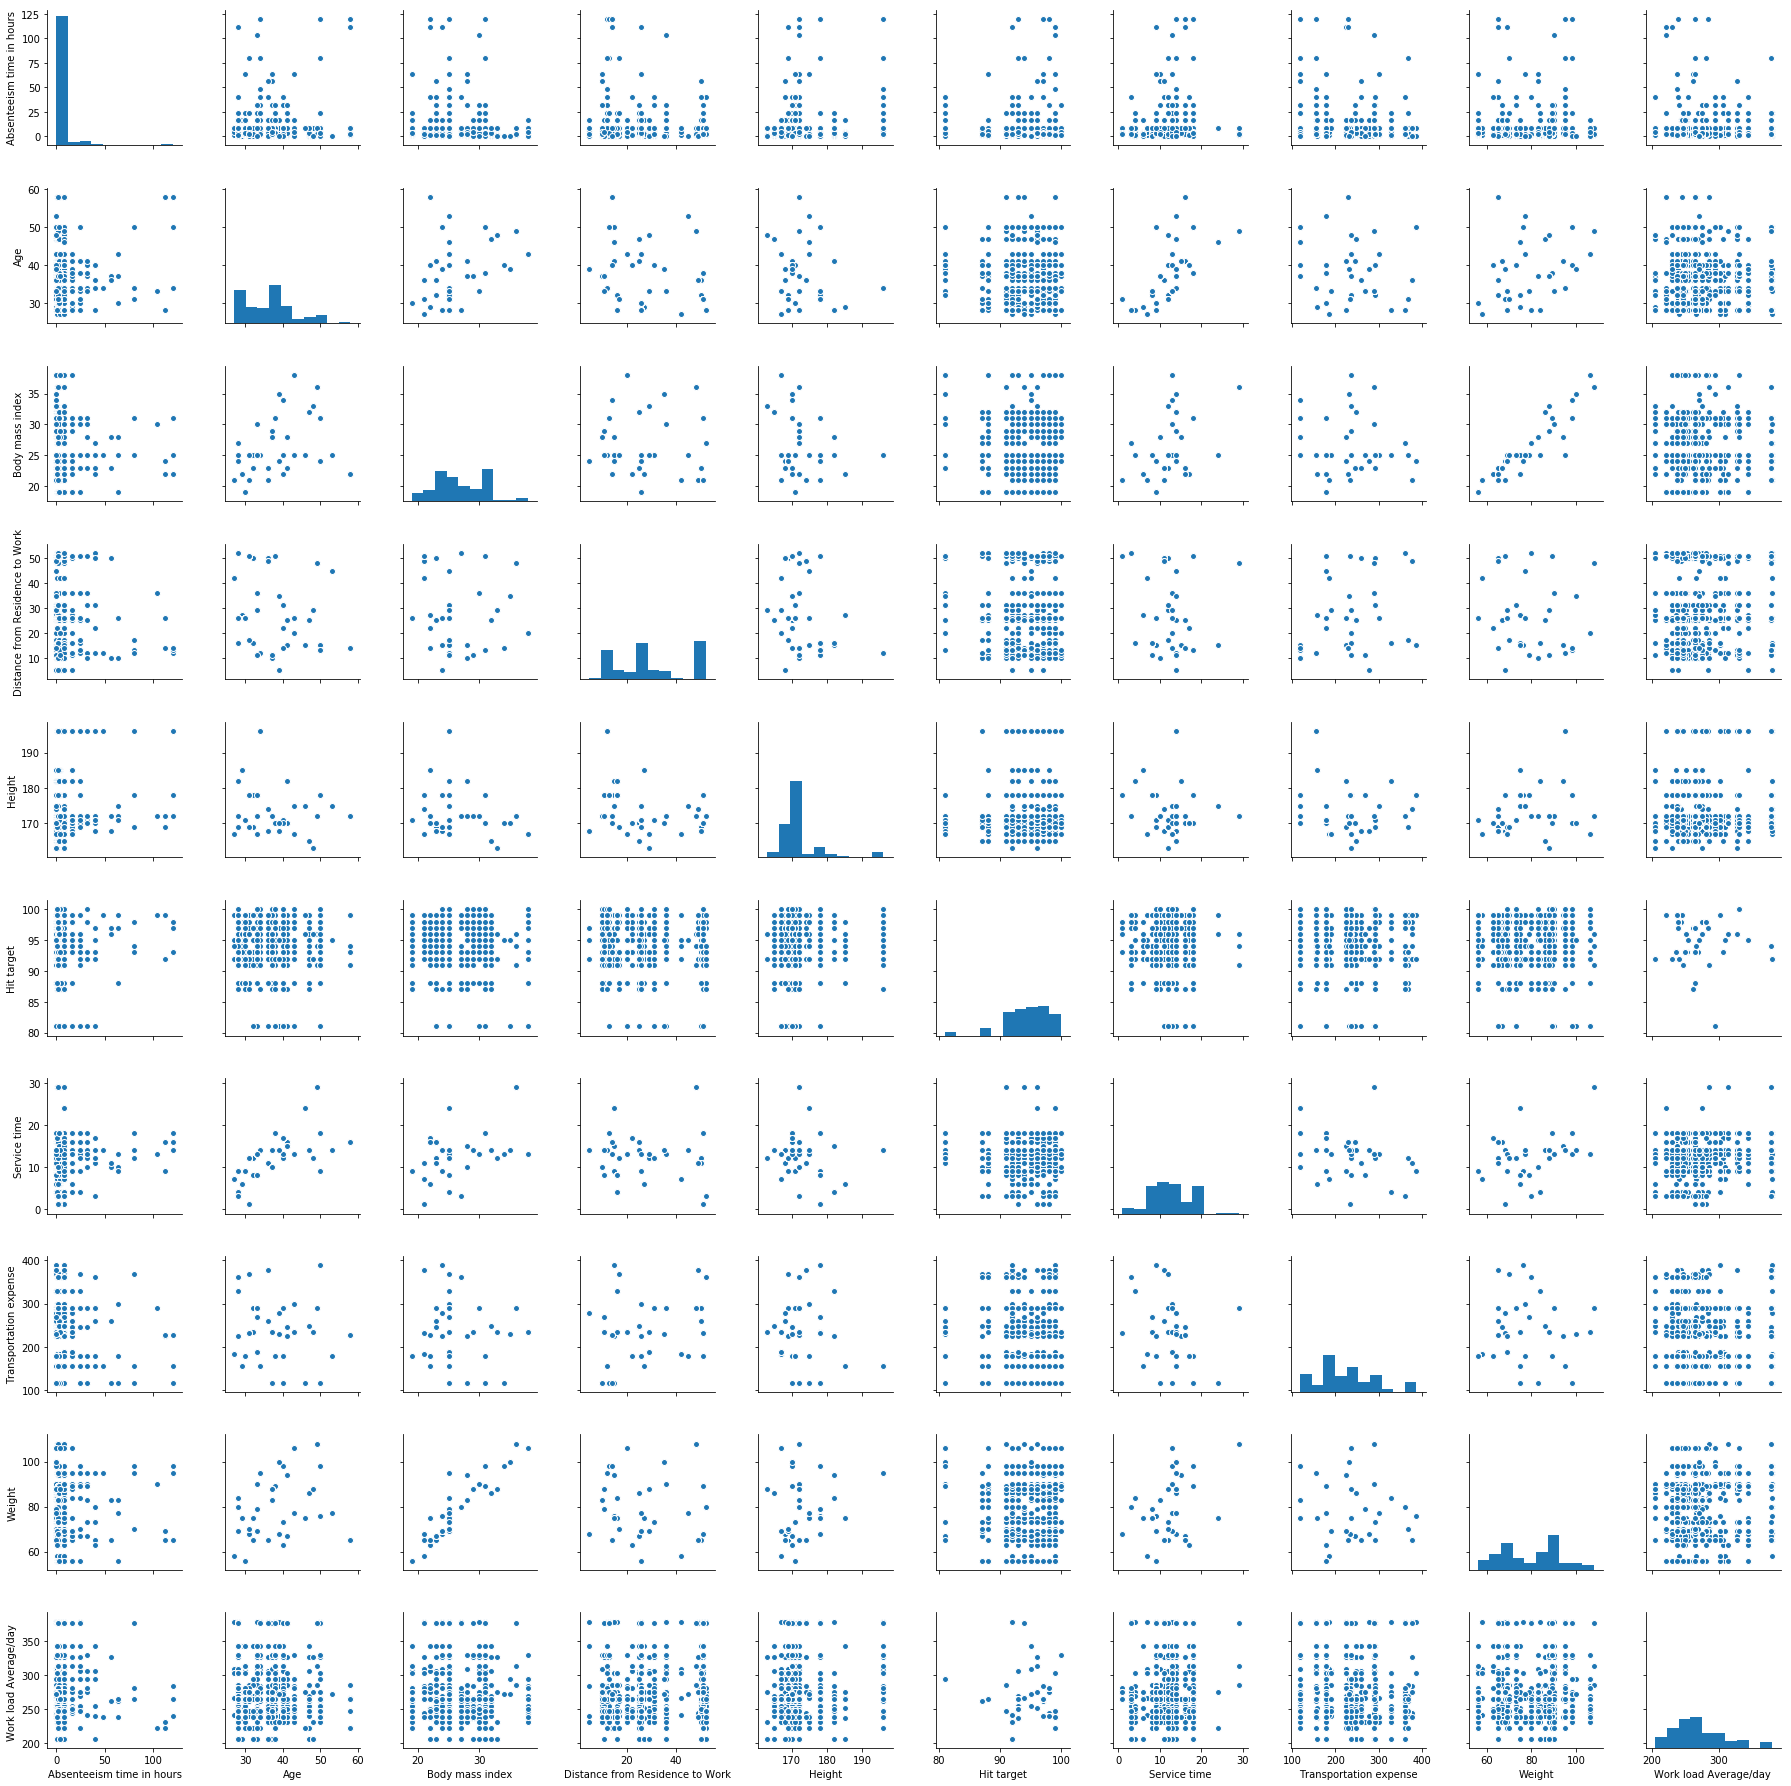

In [11]:
sns.pairplot(data[numerical]);

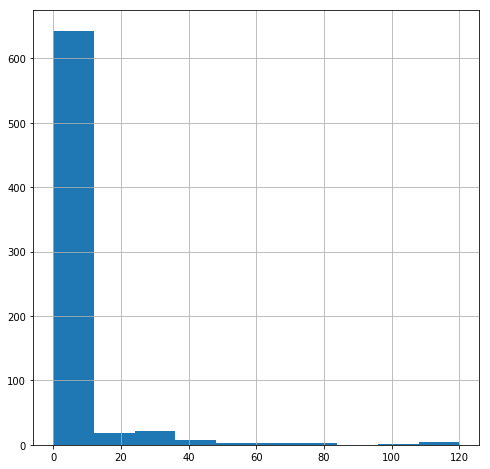

In [23]:
plt.figure(figsize=(8, 8))
data['Absenteeism time in hours'].hist();

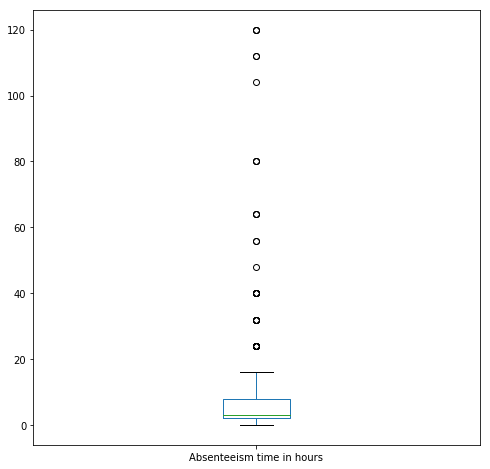

In [28]:
plt.figure(figsize=(8, 8))
data['Absenteeism time in hours'].plot.box()

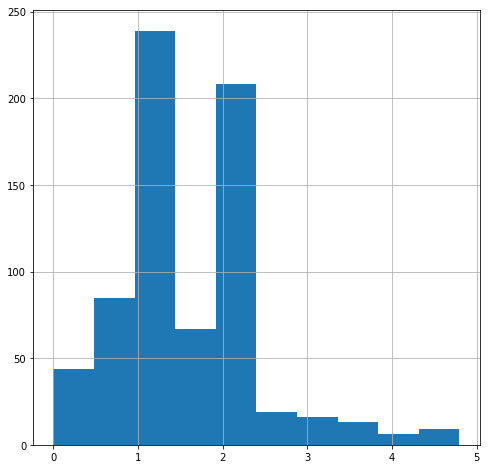

In [29]:
plt.figure(figsize=(8, 8))
(data['Absenteeism time in hours']+1).apply(np.log).hist();

## Убираем выбросы целевой!

In [161]:
data = data[data['Absenteeism time in hours'] <= 60]

In [162]:
data['Absenteeism time in hours'] = (data['Absenteeism time in hours']+1).apply(np.log)

## Categorical Variables

In [54]:
data[categorical].head()

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,26,7,3,1,0,1,2,1,0,1,1.609438
1,0,7,3,1,1,1,1,1,0,0,0.000000
2,23,7,4,1,0,1,0,1,0,0,1.098612
3,7,7,5,1,0,1,2,1,1,0,1.609438
4,23,7,5,1,0,1,2,1,0,1,1.098612


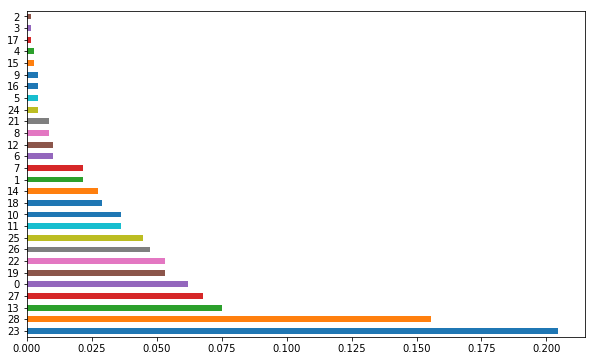

In [59]:
data['Reason for absence'].value_counts(normalize=True).plot.barh(figsize=(10, 6));

## Encoding


In [61]:
data['Reason for absence'].value_counts(normalize=True)

23    0.204611
28    0.155620
13    0.074928
27    0.067723
0     0.061960
19    0.053314
22    0.053314
26    0.047550
25    0.044669
11    0.036023
10    0.036023
18    0.028818
14    0.027378
1     0.021614
7     0.021614
6     0.010086
12    0.010086
8     0.008646
21    0.008646
24    0.004323
5     0.004323
16    0.004323
9     0.004323
15    0.002882
4     0.002882
17    0.001441
3     0.001441
2     0.001441
Name: Reason for absence, dtype: float64

In [64]:
data['Reason for absence'].value_counts(normalize=True)[:5]

23    0.204611
28    0.155620
13    0.074928
27    0.067723
0     0.061960
Name: Reason for absence, dtype: float64

We will leave the most used categories and convert the rest into the zeros

In [66]:
stay = [0, 27, 13, 28, 23]

In [68]:
data['Reason for absence'] = data['Reason for absence'].apply(
    lambda x: x if x in stay else -1
)

## Second option - getting reed of the reason

In [163]:
data.drop(['Reason for absence'], axis=1, inplace=True)
categorical.remove('Reason for absence')

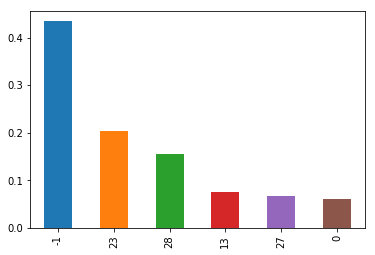

In [70]:
data['Reason for absence'].value_counts(normalize=True).plot.bar();

In [74]:
len(data['Month of absence'].unique())

13

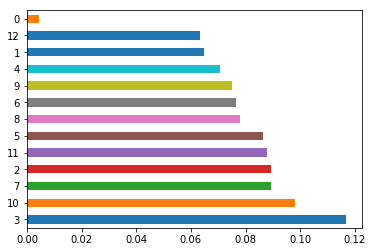

In [75]:
data['Month of absence'].value_counts(normalize=True).plot.barh();

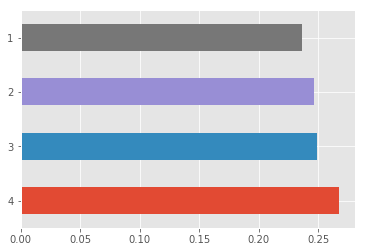

In [81]:
data['Seasons'].value_counts(normalize=True).plot.barh();

In [164]:
data.drop(['Month of absence'], axis=1, inplace=True)

In [166]:
#categorical.remove('Month of absence')

In [84]:
data[categorical].head()

,Reason for absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,-1,3,1,0,1,2,1,0,1,1.609438
1,0,3,1,1,1,1,1,0,0,0.000000
2,23,4,1,0,1,0,1,0,0,1.098612
3,-1,5,1,0,1,2,1,1,0,1.609438
4,23,5,1,0,1,2,1,0,1,1.098612


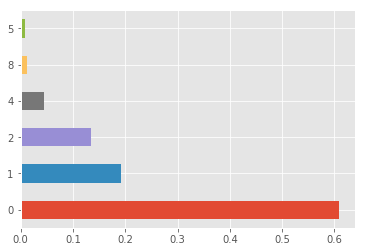

In [97]:
data['Pet'].value_counts(normalize=True).plot.barh();

In [167]:
data['Pet'] = data['Pet'].apply(lambda x: x if x in [0, 1] else "more")

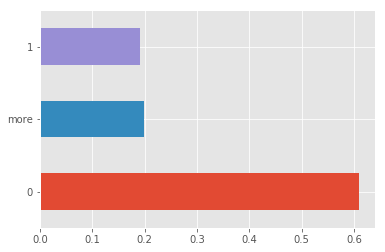

In [100]:
data['Pet'].value_counts(normalize=True).plot.barh();

In [168]:
data = pd.get_dummies(data, columns=categorical, drop_first=True)

In [106]:
data.shape

(694, 34)

In [109]:
data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,...,Education_3,Education_4,Son_1,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_more
0,289,36,13,33,239.554,97,90,172,30,1.609438,...,0,0,0,1,0,0,1,0,1,0
1,118,13,18,50,239.554,97,98,178,31,0.000000,...,0,0,1,0,0,0,1,0,0,0
2,179,51,18,38,239.554,97,89,170,31,1.098612,...,0,0,0,0,0,0,1,0,0,0
3,279,5,14,39,239.554,97,68,168,24,1.609438,...,0,0,0,1,0,0,1,1,0,0
4,289,36,13,33,239.554,97,90,172,30,1.098612,...,0,0,0,1,0,0,1,0,1,0


In [170]:
data = data[data['Reason for absence_0']!=1]

In [143]:
data.shape

(651, 34)

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Absenteeism time in hours'], axis=1), 
    data['Absenteeism time in hours'],
    test_size=0.3
)

In [172]:
import warnings
warnings.filterwarnings("ignore")

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_numeric = scaler.fit_transform(X_train[numerical])
X_test_scaled_numeric = scaler.transform(X_test[numerical])

X_train[numerical] = X_train_scaled_numeric
X_test[numerical] = X_test_scaled_numeric

In [174]:
from sklearn import metrics
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [182]:
def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(np.exp(y_test)-1, np.exp(y_pred)-1),
       np.sqrt(metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1)),
       metrics.r2_score(np.exp(y_test), np.exp(y_pred)-1),
       mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))
    ]
    return stats
measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

""
error_type
MAE
RMSE
R2
MAPE


In [176]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([1.54859862, 1.54859862, 1.54859862, 1.54859862, 1.54859862])

In [183]:
measured_metrics["naive"] = dataframe_metrics(y_test, y_pred_naive)
measured_metrics

,error_type,naive
0,MAE,3.739584
1,RMSE,6.942342
2,R2,-0.184861
3,MAPE,66.899087


In [184]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()


model_regression.fit(X_train, y_train)

 
y_pred_regr = model_regression.predict(X_test)

measured_metrics["simple_linreg"] = dataframe_metrics(y_test, y_pred_regr)
measured_metrics

,error_type,naive,simple_linreg
0,MAE,3.739584,3.361999
1,RMSE,6.942342,6.613918
2,R2,-0.184861,-0.057236
3,MAPE,66.899087,57.688939


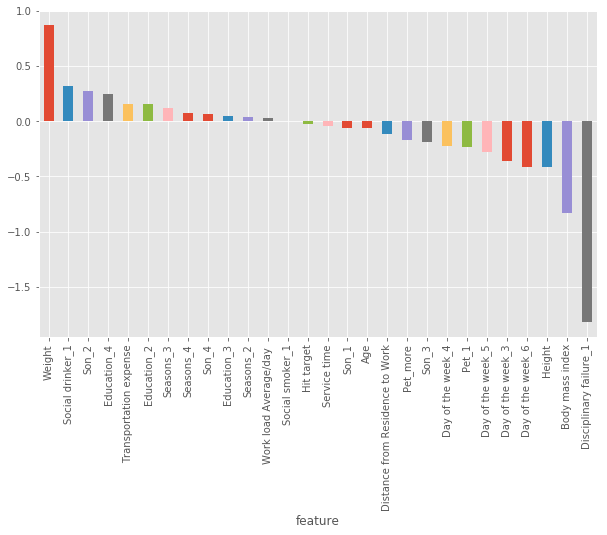

In [185]:
featureImportance = pd.DataFrame({"feature": data.drop(target,axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

Лучшее значение параметра: 0.0035875804964222336


,error_type,naive,simple_linreg,lasso_cv
0,MAE,3.739584,3.361999,3.365090
1,RMSE,6.942342,6.613918,6.647892
2,R2,-0.184861,-0.057236,-0.075009
3,MAPE,66.899087,57.688939,55.548557


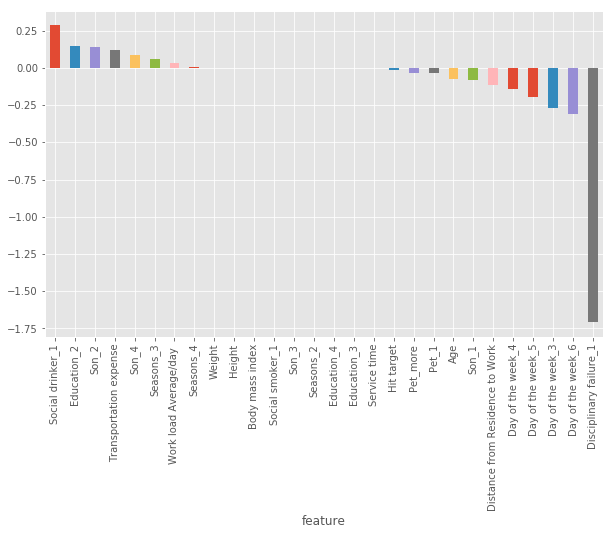

In [186]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(cv=5)


lasso_cv.fit(X_train, y_train)
print('Best parameter:', lasso_cv.alpha_)

y_pred_lasso = lasso_cv.predict(X_test)


featureImportance = pd.DataFrame({"feature": data.drop(target,axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));


measured_metrics["lasso_cv"] = dataframe_metrics(y_test, y_pred_lasso)
measured_metrics

,error_type,naive,simple_linreg,lasso_cv,elastic_cv
0,MAE,3.739584,3.361999,3.365090,3.358092
1,RMSE,6.942342,6.613918,6.647892,6.624504
2,R2,-0.184861,-0.057236,-0.075009,-0.066182
3,MAPE,66.899087,57.688939,55.548557,56.034829


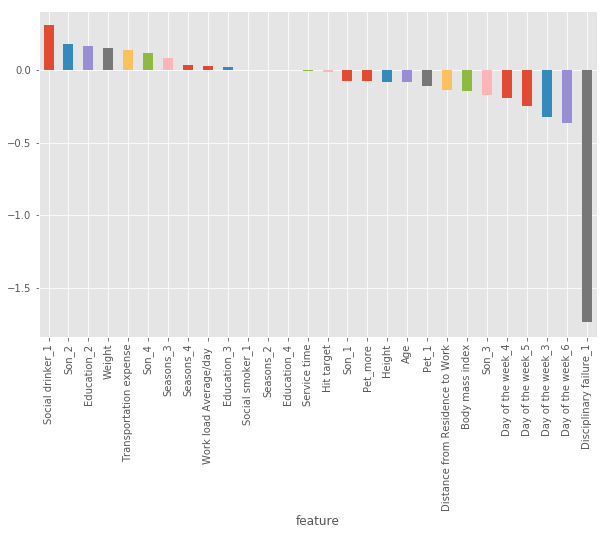

In [187]:
from sklearn.linear_model import ElasticNetCV


elastic_cv = ElasticNetCV(cv=5)


elastic_cv.fit(X_train, y_train)

 
y_pred_elastic = elastic_cv.predict(X_test)


featureImportance = pd.DataFrame({"feature": data.drop(target,axis=1).columns, 
                                  "importance": elastic_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));


measured_metrics["elastic_cv"] = dataframe_metrics(y_test, y_pred_elastic)
measured_metrics